In [1]:
from Datos import Datos
from EstrategiaParticionado import *
from Clasificador import *
import numpy as np
from sklearn import preprocessing 
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score



## Sklearn sin Laplace para validación Simple con valores Discretos

In [ ]:
dataset = Datos("ConjuntosDatos/tic-tac-toe.data")

# Encode categorical integer features using a one-hot aka one-of-K scheme (categorical features)
encAtributos = preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1],sparse=False)
# X contendra la matriz de atributos codificada
X = encAtributos.fit_transform(dataset.datos[:,:-1])

# Y contendra la clase de cada patron
Y =dataset.datos[:,-1] 

#Discretos = MultinomialNB
#para no Laplace -> alpha = 0
clf = MultinomialNB(alpha=0)

#Validacion Simple
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.6 )

#Entrena el clasificador a partir de xTrain e yTrain
classifier = clf.fit(xTrain, yTrain)
#Predice el resultado de xTest en base al entrenamiento
pred = classifier.predict(xTest)

# Calcula el error (1 - la precision de la clasificacion)
error = 1  - accuracy_score(pred, yTest)
print(error)


## Sklearn con Laplace para validación Simple con valores Discretos

In [ ]:
# Encode categorical integer features using a one-hot aka one-of-K scheme (categorical features)
encAtributos = preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1],sparse=False)
# X contendra la matriz de atributos codificada
X = encAtributos.fit_transform(dataset.datos[:,:-1])

# Y contendra la clase de cada patron
Y =dataset.datos[:,-1] 

#Discretos = MultinomialNB
#para Laplace -> alpha = 1
clf = MultinomialNB(alpha=1)

#Validacion Simple
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.6 )

#Entrena el clasificador a partir de xTrain e yTrain
classifier = clf.fit(xTrain, yTrain)
#Predice el resultado de xTest en base al entrenamiento
pred = classifier.predict(xTest)

# Calcula el error (1 - la precision de la clasificacion)
error = 1  - accuracy_score(pred, yTest)
print(error)


## Sklearn para validación Simple con valores Continuos

In [ ]:
dataset = Datos("ConjuntosDatos/german.data")

        
# Encode categorical integer features using a one-hot aka one-of-K scheme (categorical features)
encAtributos = preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1],sparse=False)
# X contendra la matriz de atributos codificada
X = encAtributos.fit_transform(dataset.datos[:,:-1])

# Y contendra la clase de cada patron
Y =dataset.datos[:,-1] 

#Continuos = GaussianNB
clf = GaussianNB()

#Validacion Simple
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.6 )

#Entrena el clasificador a partir de xTrain e yTrain
classifier = clf.fit(xTrain, yTrain)
#Predice el resultado de xTest en base al entrenamiento
pred = classifier.predict(xTest)

# Calcula el error (1 - la precision de la clasificacion)
error = 1  - accuracy_score(pred, yTest)
print(error)


## Sklearn sin Laplace para validación Cruzada con valores Discretos

In [ ]:
dataset = Datos("ConjuntosDatos/tic-tac-toe.data")

# Encode categorical integer features using a one-hot aka one-of-K scheme (categorical features)
encAtributos = preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1],sparse=False)
# X contendra la matriz de atributos codificada
X = encAtributos.fit_transform(dataset.datos[:,:-1])

# Y contendra la clase de cada patron
Y =dataset.datos[:,-1] 

#Discretos = MultinomialNB
#para no Laplace -> alpha = 0
clf = MultinomialNB(alpha=1.0e-10)

#Validacion Cruzada: obtenemos los resultados de las predicciones de cv iteraciones
pred_kfolds = cross_val_score(clf, X, Y, cv = 5)

#Obtenemos el error de la media de las predicciones
media_error = 1 - pred_kfolds.mean()

#Obtenemos la desviacion tipica de las predicciones
desv_error = pred_kfolds.std()

print(media_error, desv_error)

## Sklearn con Laplace para validación Cruzada con valores Discretos

In [ ]:
# Encode categorical integer features using a one-hot aka one-of-K scheme (categorical features)
encAtributos = preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1],sparse=False)
# X contendra la matriz de atributos codificada
X = encAtributos.fit_transform(dataset.datos[:,:-1])

# Y contendra la clase de cada patron
Y =dataset.datos[:,-1] 

#Discretos = MultinomialNB
#para Laplace -> alpha = 1
clf = MultinomialNB(alpha=1)

#Validacion Cruzada: obtenemos los resultados de las predicciones de cv iteraciones
pred_kfolds = cross_val_score(clf, X, Y, cv = 5)

#Obtenemos el error de la media de las predicciones
media_error = 1 - pred_kfolds.mean()

#Obtenemos la desviacion tipica de las predicciones
desv_error = pred_kfolds.std()

print(media_error, desv_error)

## Sklearn para validación Cruzada con valores Continuos

In [ ]:
dataset = Datos("ConjuntosDatos/german.data")

        
# Encode categorical integer features using a one-hot aka one-of-K scheme (categorical features)
encAtributos = preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1],sparse=False)
# X contendra la matriz de atributos codificada
X = encAtributos.fit_transform(dataset.datos[:,:-1])

# Y contendra la clase de cada patron
Y =dataset.datos[:,-1] 

#Discretos = MultinomialNB
#para no Laplace -> alpha = 0
clf = GaussianNB()

#Validacion Cruzada: obtenemos los resultados de las predicciones de cv iteraciones
pred_kfolds = cross_val_score(clf, X, Y, cv = 5)

#Obtenemos el error de la media de las predicciones
media_error = 1 - pred_kfolds.mean()

#Obtenemos la desviacion tipica de las predicciones
desv_error = pred_kfolds.std()

print(media_error, desv_error)

## Sklearn para KNN

In [ ]:
# Encode categorical integer features using a one-hot aka one-of-K scheme (categorical features)
encAtributos = preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1],sparse=False)
# X contendra la matriz de atributos codificada
X = encAtributos.fit_transform(dataset.datos[:,:-1])

# Y contendra la clase de cada patron
Y =dataset.datos[:,-1] 


n_neighbors = 1
clf = KNeighborsClassifier(n_neighbors)

#Validacion Cruzada: obtenemos los resultados de las predicciones de cv iteraciones
knn = cross_val_score(clf, X, Y, cv = 10)

#Obtenemos el error de la media de las predicciones
media_error = 1 - knn_cv.mean()

#Obtenemos la desviacion tipica de las predicciones
desv_error = knn_cv.std()

print(media_error, desv_error)

In [ ]:
from plotModel import plotModel
import matplotlib.pyplot as plt

dataset = Datos("ConjuntosDatos/example1.data")
k_values = [1, 3, 5, 11, 21, 51]

for k in k_values:
    print("-------------------------------------------------------------------")
    estrategia = ValidacionCruzada()
    knn = ClasificadorVecinosProximos(k, normaliza=True)
    val = knn.validacion(estrategia,dataset,knn)
    print("K = ", k)
    print("\nDatos normalizados:")
    print("Promedio del error = ", round(np.array(val).mean(),4), "\tDesviación típica = ", round(np.array(val).std(),4))
print(estrategia.particiones)
    ii=estrategia.particiones[-1].indicesTrain 


    plotModel(dataset.datos[ii,0],dataset.datos[ii,1],dataset.datos
    [ii,-1]!=0,clasificador,"Frontera",dataset.diccionarios) 



plt.figure()
plt.plot(dataset.datos[dataset.datos[:,-1]==0,0], dataset.datos[dataset.datos[:,-1]==0,1],'bo')
plt.plot(dataset.datos[dataset.datos[:,-1]==1,0], dataset.datos[dataset.datos[:,-1]==1,1],'ro')

In [ ]:
from plotModel import plotModel
import matplotlib.pyplot as plt

dataset = Datos("ConjuntosDatos/example1.data")
k_values = [1, 3, 5, 11, 21, 51]

for k in k_values:
    print("-------------------------------------------------------------------")
    print("K = ", k)
    estrategia = ValidacionCruzada()
    knn = ClasificadorVecinosProximos(k, normaliza=True)
    val = knn.validacion(estrategia,dataset,knn)

    print("\nDatos normalizados:")
    print("Promedio del error = ", round(np.array(val).mean(),4), "\tDesviación típica = ", round(np.array(val).std(),4))
    ii=estrategia.particiones[-1].indicesTrain 

    plotModel(dataset.datos[ii,0],dataset.datos[ii,1],dataset.datos[ii,-1]!=0,knn,"KNN K = " +str(k),dataset.diccionarios) 


    plt.figure()
    plt.plot(dataset.datos[dataset.datos[:,-1]==0,0], dataset.datos[dataset.datos[:,-1]==0,1],'ro')
    plt.plot(dataset.datos[dataset.datos[:,-1]==1,0], dataset.datos[dataset.datos[:,-1]==1,1],'bo')

-------------------------------------------------------------------
pasos =  10 η =  1
Resultados implementación propia:
Promedio del error =  0.37 	Desviación típica =  0.2147
-------------------------------------------------------------------
pasos =  100 η =  1
Resultados implementación propia:
Promedio del error =  0.5075 	Desviación típica =  0.219
-------------------------------------------------------------------
pasos =  10 η =  0.5
Resultados implementación propia:
Promedio del error =  0.5125 	Desviación típica =  0.1971
-------------------------------------------------------------------
pasos =  100 η =  0.5
Resultados implementación propia:
Promedio del error =  0.5025 	Desviación típica =  0.2324


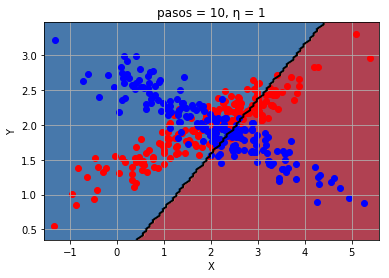

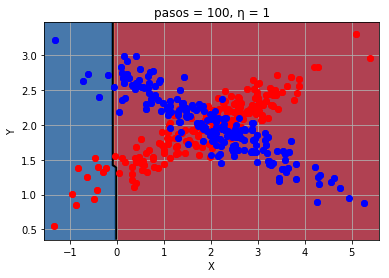

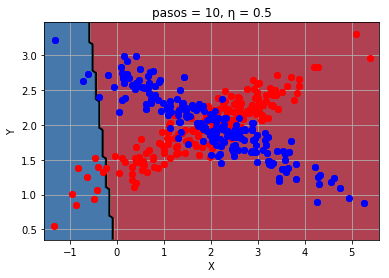

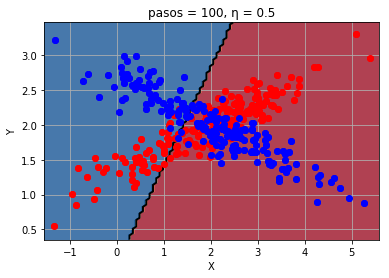

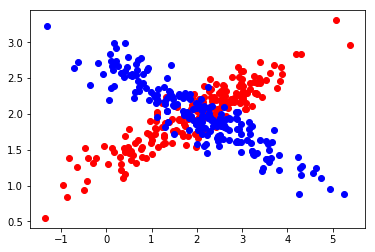

In [6]:
from plotModel import plotModel
import matplotlib.pyplot as plt

dataset = Datos("ConjuntosDatos/example1.data")
pasos = [10, 100, 10, 100]
aprend = [1, 1, 0.5, 0.5]

for i in range(len(pasos)):
    estrategia = ValidacionCruzada()
    reglog = ClasificadorRegresionLogistica(pasos[i], aprend[i])
    val = reglog.validacion(estrategia,dataset,reglog)
    print("-------------------------------------------------------------------")
    print("pasos = ", pasos[i], "η = ", aprend[i])
    print("Resultados implementación propia:")
    print("Promedio del error = ", round(np.array(val).mean(),4), "\tDesviación típica = ", round(np.array(val).std(), 4))
    ii=estrategia.particiones[-1].indicesTrain 

    plotModel(dataset.datos[ii,0],dataset.datos[ii,1],dataset.datos[ii,-1]!=0,reglog,"pasos = "+ str(pasos[i]) + ", η = "+ str(aprend[i]),dataset.diccionarios) 


    plt.figure()
    plt.plot(dataset.datos[dataset.datos[:,-1]==0,0], dataset.datos[dataset.datos[:,-1]==0,1],'ro')
    plt.plot(dataset.datos[dataset.datos[:,-1]==1,0], dataset.datos[dataset.datos[:,-1]==1,1],'bo')